#LeNet-5 Fashion-MNIST example


In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
x_train, x_test = x_train/255.0, x_test/255.0

In [0]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

In [0]:
labels = ["T_shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


LeNet-5 model:


In [0]:
model = tf.keras.models.Sequential([

   #C1 - feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
  
   #S2 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),

   #C3 - Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'),

   #S4 - Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   tf.keras.layers.Flatten(),

   #C5 - Full connection:
   tf.keras.layers.Dense(120, activation='relu'),

   #FC-6 - Fully connected layer:
   tf.keras.layers.Dense(84, activation='relu'),

   #Output   
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

In [0]:
n_epochs=15
n_batch=32
learning_rate=0.01

In [0]:
opt = tf.keras.optimizers.SGD(lr=learning_rate, decay=learning_rate / n_epochs, momentum=0.9, nesterov=True )

In [0]:
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [0]:
H = model.fit(x_train,ytrain, validation_data=(x_test,ytest),
              epochs=n_epochs, batch_size=n_batch)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4837 - accuracy: 0.8229 - val_loss: 0.3515 - val_accuracy: 0.8712
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3061 - accuracy: 0.8879 - val_loss: 0.3092 - val_accuracy: 0.8883
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9020 - val_loss: 0.2823 - val_accuracy: 0.8977
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2424 - accuracy: 0.9110 - val_loss: 0.2691 - val_accuracy: 0.9028
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2262 - accuracy: 0.9163 - val_loss: 0.2697 - val_accuracy: 0.9012
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2131 - accuracy: 0.9209 - val_loss: 0.2565 - val_accuracy: 0.9059
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2022 - accuracy: 0.9255 - val_loss: 0.2610 - val_accuracy:

In [0]:
predictions = model.predict(x_test, batch_size=n_batch)

In [0]:
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

     T_shirt       0.85      0.89      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.83      0.86      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.78      0.73      0.76      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle_boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



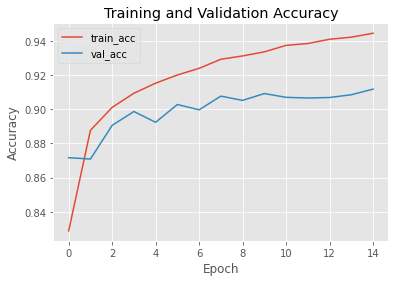

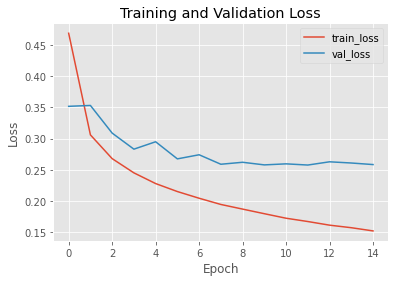

In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()